### CSCI E-82  Homework 3

### Due by 10/22/18 at 11:59pm EST to the Canvas dropbox

## This is an individual homework so there should be no collaboration for this homework.


### Under each problem, we have a place for you to write the answer, or write runnable code that will produce the answer.  Show your work.
-----------


## Your Name: Sydney Correa

In [325]:
# Basic Python libraries
import pandas as pd
import numpy as np
import re

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns
import pprint
import plotly as ply

from sklearn.linear_model import LinearRegression

# special matplotlib command for global plot configuration
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix


import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.graphics.api as smg
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, periodogram
from statsmodels.graphics.gofplots import qqplot

In [320]:
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),            
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

cmap_set1 = ListedColormap(['#e41a1c', '#377eb8', '#4daf4a'])
dark2_cmap=ListedColormap(dark2_colors)

def set_mpl_params():
    rcParams['figure.figsize'] = (12, 6)
    rcParams['figure.dpi'] = 100
    rcParams['axes.prop_cycle'].by_key()['color'][1]
    rcParams['lines.linewidth'] = 2
    rcParams['axes.facecolor'] = 'white'
    rcParams['font.size'] = 14
    rcParams['patch.edgecolor'] = 'white'
    rcParams['patch.facecolor'] = dark2_colors[0]
    rcParams['font.family'] = 'StixGeneral'

set_mpl_params()

## Problem 1 Climate Change (30 points) 

Scientists and politicians are often at odds on the topic of whether global warming is real and debate the various causes. This problem uses "globalWarm3.csv" data.  This is a real data set.

In [3]:
#import dataset globalWarm3.csv 

df_GlbWarm = pd.read_csv("C:\\Users\\corre\\Desktop\\CSCI E-82\\PS 3\\globalWarm3.csv", sep=',', header=0)
print(df_GlbWarm.head())


   Year  Temp     CO2    Solar  Transmission  IceShelf
0  1980    19  338.57  1366.51      0.929667      7.85
1  1981    26  339.92  1366.51      0.929767      7.25
2  1982     4  341.30  1366.16      0.853067      7.45
3  1983    25  342.71  1366.18      0.897717      7.52
4  1984     9  344.24  1365.71      0.916492      7.17


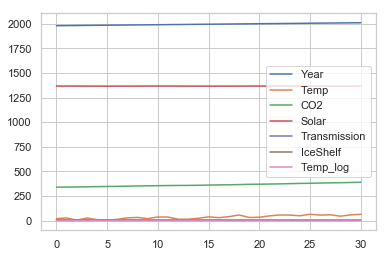

In [371]:
df_GlbWarm.plot()
plt.show()

### Problem 1a 
Plot a scatter plot of the following variables in a lattice: Temp, CO2, Solar, Transmission, and IceShelf. 
    
The variables represent the following:
- Temp = annual surface temperature measured in $1/100^{\circ} C$ over the 1950-1980 mean.
- Solar = annual mean intensity of sunlight piercing the atmosphere 
- CO2 = annual average fraction CO2 in atmosphere (#molecules/#molecules of dry air) 
- IceShelf = sea ice in 1MM square miles hypothesized to reflect heat 
- Transmission = volcanic MLO transmission data where eruptions release greenhouse gases but also decrease the temperature 




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271CCCE6630>,
      dtype=object)

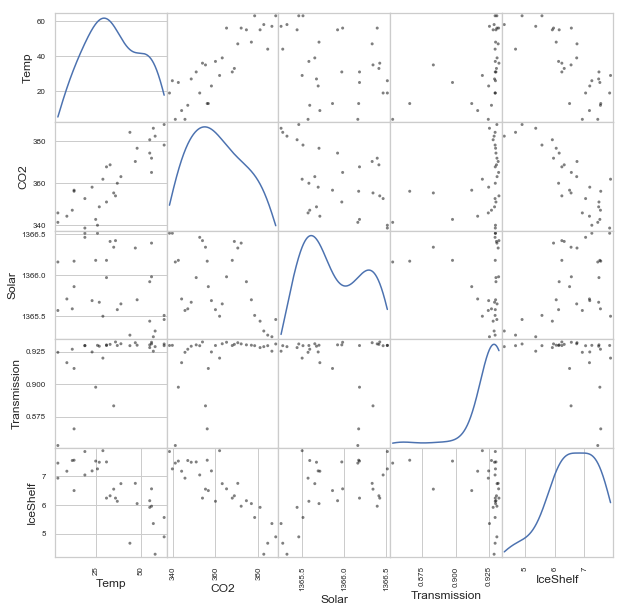

In [373]:
## plot of scatter matrix for all 5 features
scatter_matrix(df_GlbWarm.loc[:,'Temp':'IceShelf'], figsize=(10,10), c='black',alpha=0.5, diagonal='kde')


### Problem 1b 
Compute a multiple linear regression model of log(Temp) against the other variables. Note that since there are limited number of annual measurements, you cannot run all combinations of variables. In fact, you can only do complete pairwise interactions. Be sure to remove the non-significant variables while still maintaining the hierarchy principle in your final model. You do not need to show full diagnostics for the different models that you try, but do show the equations that you tried.

   Year  Temp     CO2    Solar  Transmission  IceShelf  Temp_log
0  1980    19  338.57  1366.51      0.929667      7.85  2.944439
1  1981    26  339.92  1366.51      0.929767      7.25  3.258097
2  1982     4  341.30  1366.16      0.853067      7.45  1.386294
3  1983    25  342.71  1366.18      0.897717      7.52  3.218876
4  1984     9  344.24  1365.71      0.916492      7.17  2.197225


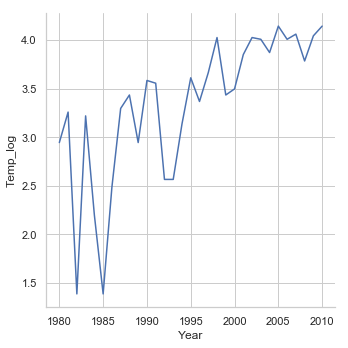

In [376]:
df_GlbWarm['Temp_log']= np.log(df_GlbWarm['Temp']) 

#show dataset with log Temp data
print(df_GlbWarm.head())

#plot of Temp_log data
sns.relplot(x="Year", y="Temp_log", data=data, palette="tab10",kind="line")

In [377]:
#use multiple linear regression with all features
lm = LinearRegression()

#CO2    Solar  Transmission  IceShelf
features = ['CO2','Solar','Transmission','IceShelf']
X = df_GlbWarm[features]
Y = df_GlbWarm['Temp_log']

lmfit = lm.fit(X, Y)

In [378]:
print ('Estimated intercept coefficient:', lm.intercept_)
print ('Adjusted R^2 of the regression:',  lm.score(X, Y))
print ('Estimated intercept coefficient:', lm.coef_)

residuals = Y - lmfit.predict(X)
fitted = lmfit.predict(X)

print("RSS : ", np.sum(residuals**2))
print("MSE : ", np.mean(residuals**2))

Estimated intercept coefficient: -766.928307516721
Adjusted R^2 of the regression: 0.7130087849320212
Estimated intercept coefficient: [ 0.044  0.544 12.299  0.094]
RSS :  4.721094967082534
MSE :  0.15229338603492043


### Check model for features and interaction terms  
Checking to see if we can get a more significant model by using sklearn feature selection we see that all features are significant. Dropping any of the features gives less significant R and Adj R values and higher MSE and RSS

In [41]:
from sklearn.feature_selection import RFE  #Recursive(Backward) feature selection, takes all features and prunes out recursively.
rfe = RFE(estimator=lm, n_features_to_select=3, step=1)
rfe.fit(X, Y)
best_features = np.where(rfe.get_support())[0]
[features[i] for i in best_features]

['Solar', 'Transmission', 'IceShelf']

In [394]:
#CO2    Solar  Transmission  IceShelf
features = ['Solar','Transmission','IceShelf']
X = df_GlbWarm[features]
Y = df_GlbWarm['Temp_log']

lmfit = lm.fit(X, Y)

In [409]:
print ('Estimated intercept coefficient:', lm.intercept_)
print ('Adjusted R^2 of the regression:',  lm.score(X, Y))
print ('Estimated intercept coefficient:', lm.coef_)

residuals = Y - lmfit.predict(X)
fitted = lmfit.predict(X)

print("RSS : ", np.sum(residuals**2))
print("MSE : ", np.mean(residuals**2))

Estimated intercept coefficient: -428.11069610384516
Adjusted R^2 of the regression: 0.5208078531626161
Estimated intercept coefficient: [ 0.308 14.806 -0.441]
RSS :  7.882860219827917
MSE :  0.25428581354283597


### Introducting Interaction terms
Adding Interaction terms to check for significance of model gives a much more significant Adj Rsq with lower MSE

In [481]:
df_GlbWarm_inter = df_GlbWarm

df_GlbWarm_inter['Temp_CO2']= df_GlbWarm['Temp']*df_GlbWarm['CO2'] 
df_GlbWarm_inter['Temp_IceShelf']= df_GlbWarm['Temp']*df_GlbWarm['IceShelf'] 


#show dataset with log Temp data
print(df_GlbWarm_inter.head(6))


   Year  Temp     CO2    Solar  Transmission  IceShelf  Temp_log  Temp_CO2  \
0  1980    19  338.57  1366.51      0.929667      7.85  2.944439   6432.83   
1  1981    26  339.92  1366.51      0.929767      7.25  3.258097   8837.92   
2  1982     4  341.30  1366.16      0.853067      7.45  1.386294   1365.20   
3  1983    25  342.71  1366.18      0.897717      7.52  3.218876   8567.75   
4  1984     9  344.24  1365.71      0.916492      7.17  2.197225   3098.16   
5  1985     4  345.81  1365.57      0.924425      6.93  1.386294   1383.24   

   Temp_IceShelf  
0         149.15  
1         188.50  
2          29.80  
3         188.00  
4          64.53  
5          27.72  


In [482]:
#use multiple linear regression with all features and interaction terms
lm1 = LinearRegression()

#CO2    Solar  Transmission  IceShelf
features_int = ['Temp','CO2','IceShelf','Temp_CO2','Temp_IceShelf','Solar','Transmission']
X1 = df_GlbWarm_inter[features_int]
Y1 = df_GlbWarm_inter['Temp_log']

lmfit1 = lm1.fit(X1, Y1)

In [483]:
print ('Estimated intercept coefficient:', lm1.intercept_)
print ('Adjusted R^2 of the regression:',  lm1.score(X1, Y1))
print ('Estimated intercept coefficient:', lm1.coef_)

fitted1 = lmfit1.predict(X1)
residuals1 = Y1 - lmfit1.predict(X1)
print("RSS : ", np.sum(residuals1**2))
print("MSE : ", np.mean(residuals1**2))

Estimated intercept coefficient: -110.21519649592511
Adjusted R^2 of the regression: 0.9632248593273602
Estimated intercept coefficient: [ 0.633  0.049  0.474 -0.001 -0.012  0.064  3.832]
RSS :  0.6049625299583726
MSE :  0.019514920321237826


### Problem 1c
Run the diagnostics to determine whether your final model is appropriate.

(array([1., 1., 1., 2., 1., 8., 5., 3., 7., 2.]),
 array([-0.384, -0.322, -0.26 , -0.198, -0.136, -0.074, -0.012,  0.049,
         0.111,  0.173,  0.235]),
 <a list of 10 Patch objects>)

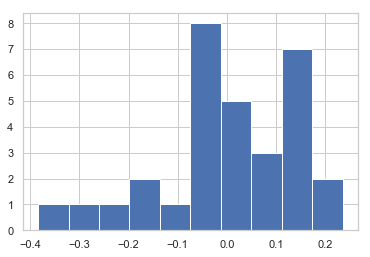

In [484]:
##checking Normality of residuals using Histogram of residuals
plt.hist(residuals1)

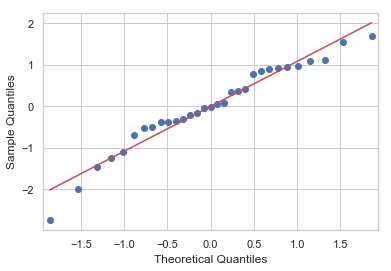

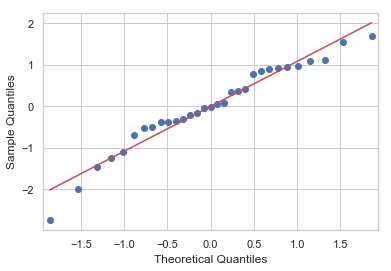

In [485]:
# QQplot to look for fit of resudiuals
qqplot(residuals1, fit=True, line='r')

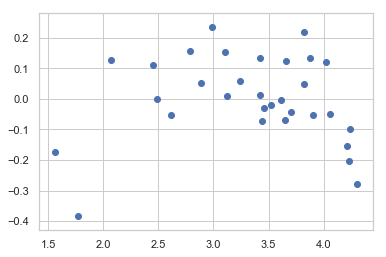

In [486]:
##fitted vs residuals to check for hetroskadacity or other model bias
plt.scatter(fitted1, residuals1)

### Problem 1d 

Describe in what way the model diagnostics are appropriate or not.  Be specific.

Histogram of residuals show a normal distribution, which indicates a good fit.

QQPlot shows residuals are along the fitted line, which indicates a good fit.

Fitted vs Residuals plot shows no fixed pattern (no hetroskadicity). This indicates that the residuals are independent. 

There are also 2 exterme points due to outlier years (1982, 1984) with extermely low temperatures in those years. 

### Problem 1e

Using your knowledge of statistics, what would you conclude about climate change?

The data suggests that Climate change is real and not a hoax. Increase in CO2 emmisions is leading to increase in temp and decreasing the Global Iceshelf.

## Problem 2  Matrix model for regression (8 points)

### Problem 2a  
Using the features that you deemed important in Problem 1, construct the matrix forms of the appropriate variables.  Specifically you will need a matrix X that has the features used in your solution and a Y = logTemp.  Print the head of each of these.

In [487]:
from numpy.linalg import inv

## set print options to dispaly matrix, array values as 2 decimal points
np.set_printoptions(precision=3, suppress=True)

In [488]:
#CO2    Solar  Transmission  IceShelf
#features = ['CO2','Solar','Transmission','IceShelf']

##create Matrix: X(N X K+1)
X_mat = df_GlbWarm_inter[features_int].values
print('X Matrix values head: ', X_mat[0:6])

##create Matrix: Y(N X 1)
Y_mat = df_GlbWarm_inter['Temp_log'].values
print('Y Matrix values head: ', Y_mat[0:6])

X Matrix values head:  [[  19.     338.57     7.85  6432.83   149.15  1366.51     0.93 ]
 [  26.     339.92     7.25  8837.92   188.5   1366.51     0.93 ]
 [   4.     341.3      7.45  1365.2     29.8   1366.16     0.853]
 [  25.     342.71     7.52  8567.75   188.    1366.18     0.898]
 [   9.     344.24     7.17  3098.16    64.53  1365.71     0.916]
 [   4.     345.81     6.93  1383.24    27.72  1365.57     0.924]]
Y Matrix values head:  [2.944 3.258 1.386 3.219 2.197 1.386]


### Problem 2b  
Use the matrix calculation for the pseudo-inverse provided in lecture.  

In [456]:
#using pseudo inverse method
#to get weights W(K+1, 1) => inv(X'X)X'Y
W=inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y_mat)
print('Weight W Matrix values: ', W)

SSE = (Y_mat-(X_mat.dot(W))).T.dot(Y_mat-(X_mat.dot(W)))

print("MSE : ", SSE)

Weight W Matrix values:  [ 0.635  0.048  0.444 -0.001 -0.011 -0.015  3.396]
MSE :  0.6220864036263751


### Diagnostic plots using pseudo inverse method 

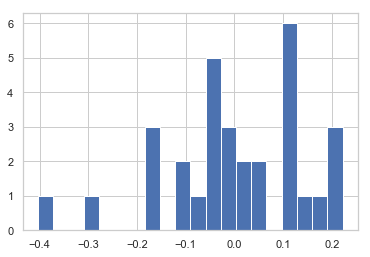

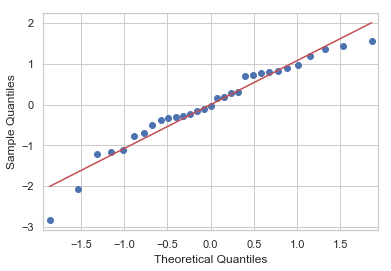

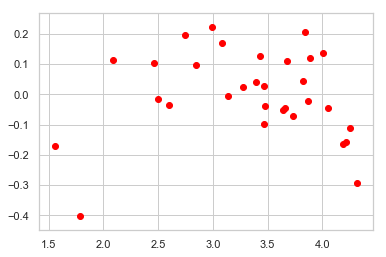

In [462]:
#print histogram of residuals
e = Y_mat-(X_mat.dot(W))
plt.hist(e, bins=20)
plt.show()

#plot qqplot
qqplot(e, fit=True, line='r')
plt.show()

# predict using coefficients
yhat = X_mat.dot(W)
# plot data and predictions
#plt.scatter(X[:,1], Y)
plt.scatter(yhat, e, color='red')
plt.show()

### Problem 2c
How does the answer in Problem 1b compare to that of 2b?

Comparing Linear Model to pseudo inverse, we can conclude that 1b is a better model than 1c

We can see that MSE of 1b is lower (0.019) than MSE of 2b (0.622). Histogram also does not show normalized residual values

The residual vs fitted plot for 1b does not show any pattern. However resudual vs fitted plot for 2b shows residuals are mostly positive 

The QQ plot does have a relatively close fit in option 2b compared to 1b 

## Problem 3 Time Series Modeling (40 points)

Use the data timeSeries4.csv for this problem. The data are monthly reports of production.

### Problem 3a
Plot the data and perform an exploratory analysis on the raw time series file. Comment on any trends, outliers, seasonality, whether it's stationary, etc.

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose


##function from Dave's Section 5 on Time Series
def breakout_plots(seas_series):
    decomposition = seasonal_decompose(seas_series) 

    f, ax = plt.subplots(1,4,figsize=(12, 7))

    plt.subplot(411)
    plt.plot(seas_series, label='Original', c=dark2_colors[0])
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', c=dark2_colors[1])
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal,label='Seasonality', c=dark2_colors[2])
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', c=dark2_colors[3])
    plt.legend(loc='upper left')
    plt.tight_layout()
    
    return decomposition

#decomposition = breakout_plots(prod['wpi'])

In [220]:
df_TS = pd.read_csv("C:\\Users\\corre\\Desktop\\CSCI E-82\\PS 3\\timeSeries4.csv", sep=',' , parse_dates=[0],index_col='DateTime', names=('DateTime','ProdVal'))

#print(pd.to_datetime(df_TS.index, ''))
df_TS.index = pd.date_range('2000-01-01',freq='M',periods=148)
#df_TS.head()
df_TS.tail()

,ProdVal
2011-12-31,25.762907
2012-01-31,28.048425
2012-02-29,26.271352
2012-03-31,24.563050
2012-04-30,27.093731


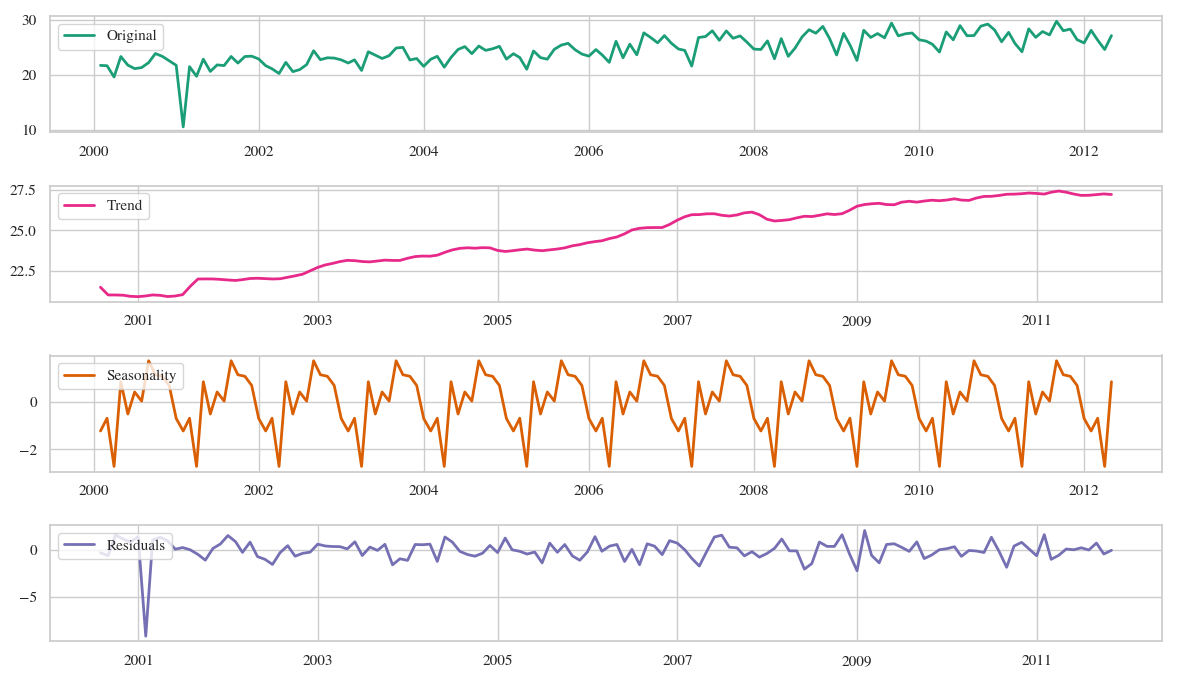

In [225]:
#plot breakouts for Raw data, Trend, Seasonality, Noise/Residuals 
breakout_plots(df_TS)

### Exploratory Analysis of time series
-Time series has increasing trend: need to take logs, non-seasonal difference

-Time seires has strong and consistent seasonal pattern: take seasonal difference

-There is a pattern within the seasonal component: SARIMA modelling of seasonal part

-Spike in the intial data point which is an outlier (value = 4). This creates a spike in the Original and Residual value trends


### Adding log term to remove trend and make it stationary

In [227]:
## adding a log term to remove the trend and make it stationary

df_TS['log_ProdVal'] = np.log(df_TS['ProdVal'])
df_TS['log_ProdVal_diff']= df_TS['log_ProdVal'].diff()
df_TS.dropna(inplace=True)   # We drop NAs resulting from the differencing
df_TS.head()

,ProdVal,log_ProdVal,log_ProdVal_diff
2000-02-29,21.622112,3.073717,-0.002893
2000-03-31,19.583297,2.974677,-0.099040
2000-04-30,23.290602,3.148050,0.173373
2000-05-31,21.729621,3.078676,-0.069374
2000-06-30,21.098816,3.049217,-0.029459


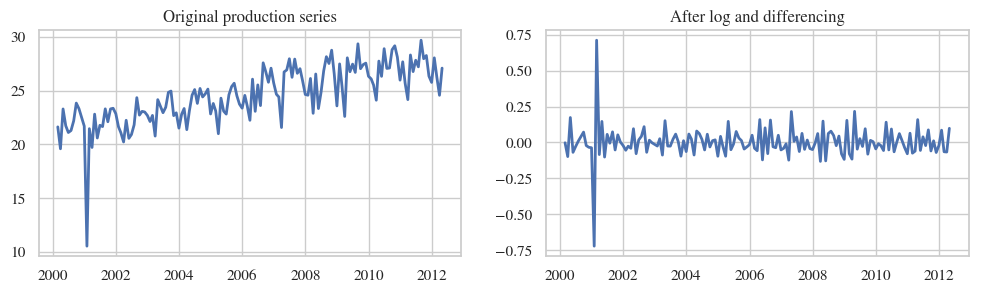

In [230]:
#Plot the data
f, ax = plt.subplots(1, 2,figsize=(12, 3))
ax[0].plot(df_TS['ProdVal']);
ax[0].set_title('Original production series')
ax[1].plot(df_TS['log_ProdVal_diff']);
#ax[1].plot(df_TS['log_ProdVal']);
ax[1].set_title('After log and differencing');

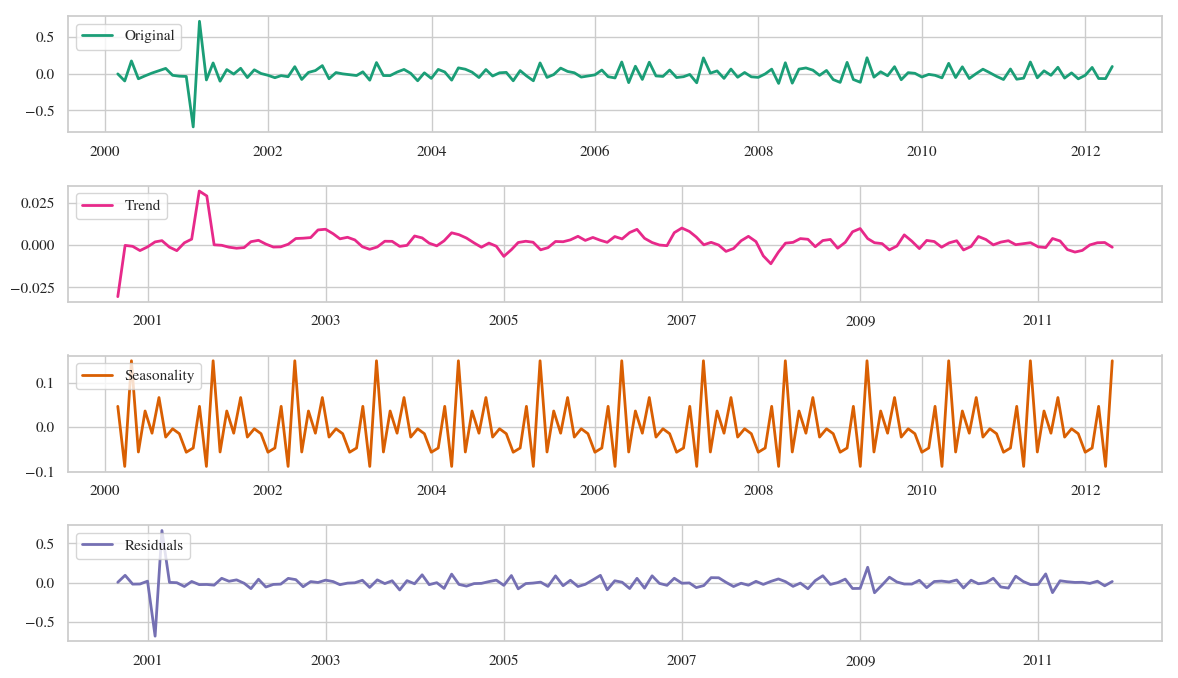

In [231]:
decomposition = breakout_plots(df_TS['log_ProdVal_diff'])

In [235]:
#_ = smg.tsa.month_plot(df_TS['log_ProdVal_diff'])

### Problem 3b
Using your knowledge of ACF, PACF and other diagnostics, walk us through the selection of an appropriate time series model for the data.  We are interested in both the result and your logical journey to reach that model.  That journey should begin with observations from the ACF and PACF pattern.

In [240]:
##citation: from Section 5 written by Dave
def tsplot(y, lags=None, figsize=(12, 12)):
    
    q, p = sm.stats.diagnostic.acorr_ljungbox(y,lags)
    fig = plt.figure(figsize=figsize)
    layout = (4, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0), colspan=2, title='QQ plot')
    lbox_ax = plt.subplot2grid(layout, (3, 0), colspan=2, title='Ljung-Box statistic')

    y.plot(ax=ts_ax, title='Residuals')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)

    qqplot(y,  line='q', ax=qq_ax, fit=True)
    if np.max(p) > 0.05:
        lbox_ax.axhline(y=0.05, xmin=0, xmax=lags, c ='r')
    lbox_ax.plot(p)
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax, lbox_ax

C:\Users\corre\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt



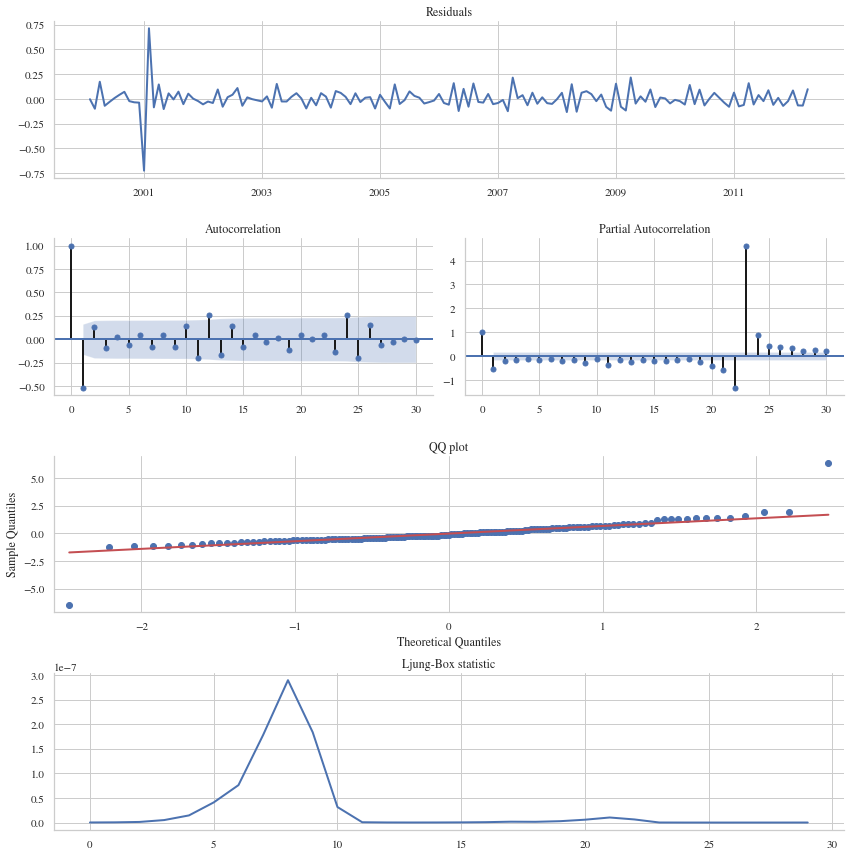

In [242]:
_ = tsplot(df_TS['log_ProdVal_diff'] , 30)

### Plotting ACF and PACF
-Step1: The ACF plot shows a negative significant term indicating this can be a MA model. Also having just 1 significant ACF value indicates this is an MA(1) model
-Step 2: The differencing term indicates a differencing of 1 can be required for the model
-Step 3:The QQ plot shows a good fit of the data
-Step 4:The Ljung-Box Statistic shows low values (with a spike for the outlier)

Based on above steps a (0,1,1) model would work for this series. 

Since there is no other significant terms in the ACF and PACF plots, we do not require AR model here. Also simple differencing can be applied to take care of first order differencing.

Seasonality in the model, indicates an Seasonal ARIMA (SARIMA) model would be required

### Problem 3c
    Apply and show the appropriate diagnostics to the model to assert that it is valid.  Include not just a plot but your interpretation of the plot in your justification.

In [260]:
## AR(2) model gives a high error rate and low AIC, BIC
#mod = sm.tsa.statespace.SARIMAX(df_TS['log_ProdVal'], order=(2,1,0), seasonal_order=(1,1,0,12), simple_differencing=True)

## AR(1) model gives a high error rate and low AIC, BIC
#mod = sm.tsa.statespace.SARIMAX(df_TS['log_ProdVal'], order=(1,1,1), seasonal_order=(0,1,1,12), simple_differencing=True)

## MA(1) model gives lower error rates and higher AIC, BIC values
mod = sm.tsa.statespace.SARIMAX(df_TS['log_ProdVal'], order=(0,0,1), seasonal_order=(0,1,1,12), simple_differencing=True)

                                 Statespace Model Results                                 
Dep. Variable:                   DS12.log_ProdVal   No. Observations:                  135
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 147.555
Date:                            Thu, 18 Oct 2018   AIC                           -289.110
Time:                                    00:58:17   BIC                           -280.394
Sample:                                02-28-2001   HQIC                          -285.568
                                     - 04-30-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1674      0.067      2.504      0.012       0.036       0.298
ma.S.L12      -0.2190      0.056   

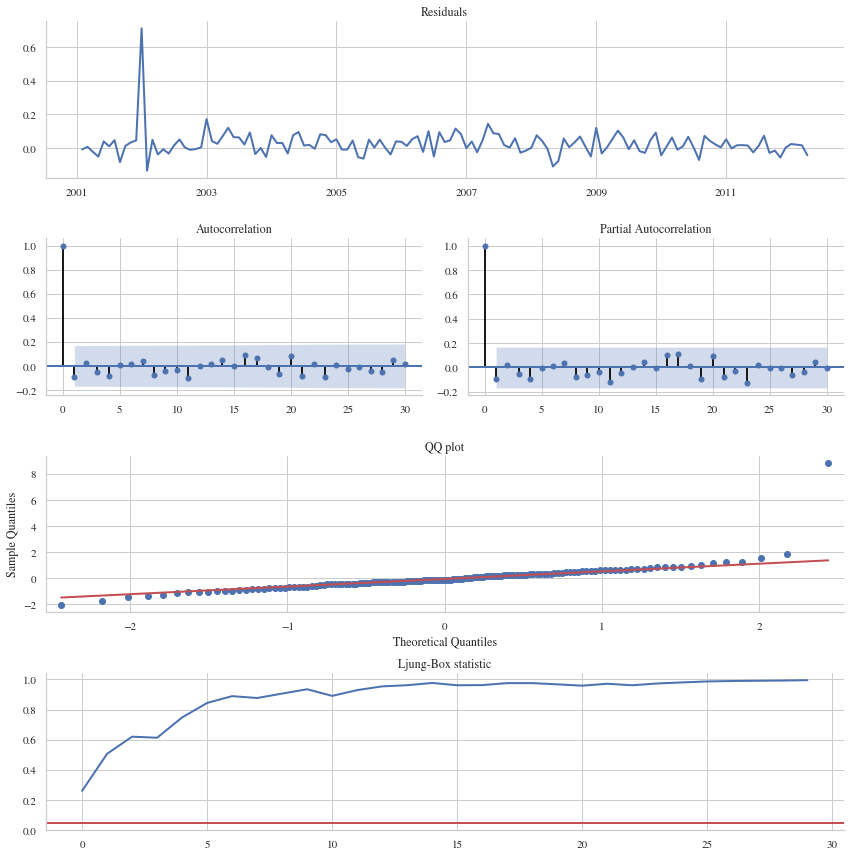

In [263]:
results_ARIMA = mod.fit()
print (results_ARIMA.summary())

_ = tsplot(results_ARIMA.resid, 30)

### Model diagnositics: SARIMA(0,0,1)
-The ACF plot shows no significant terms indicating a good fit and justifies  this is an MA(1) model

-Residual plot shows uniform pattern with very low residual values (other than 1 outlier point, which can be removed while running the final model)

-The QQ plot shows a good fit of the data

-The Ljung-Box Statistic shows high values indicating a good fit for the model

## Problem 4 (15 points)

For a time series data set, a (2,1,1) was derived with the following coefficients:

const   -0.3916      
ar1      0.9172      
ar2     -0.2390      
ma1      0.4012      

The last 5 points are -104.6, -102.1, -103.2, -109.8, -115.7

Compute the next 3 data points by writing the calculation in python.  Note that this will require not only plugging values into the equation, but also taking the d term of the (p,d,q) ARIMA model into account.  We do not need a general form or function--just the required calculations.

In [479]:
#initialize values
c=-0.3916
ar1=0.9172
ar2=-0.2390
ma1=0.4012
ar_series = np.array([-104.6,-102.1,-103.2,-109.8,-115.7,0,0,0])
print('Array of series: ', ar_series)


Array of series:  [-104.6 -102.1 -103.2 -109.8 -115.7    0.     0.     0. ]


In [480]:
#model for ARIMA(p,d,q) => (2,1,0)

for icnt in range(4,7):
    #print(ar_pts[icnt], ar_pts[icnt-1])
    
    #eq for ar(2) with d(1):
    #y(t)= c + ar1*(x[t]-x[t-1]) + ar2*(x[t-1]-x[t-2]) + w[t] 
    ar_next= c + ar1*(ar_series[icnt]-ar_series[icnt-1])+ ar2*(ar_series[icnt-1]-ar_series[icnt-2]) + ar_series[icnt]    
    #print(ar_next)
    ar_series[icnt+1]=ar_next
    print('Next points in series :', ar_series)

Next points in series : [-104.6   -102.1   -103.2   -109.8   -115.7   -119.926    0.       0.   ]
Next points in series : [-104.6   -102.1   -103.2   -109.8   -115.7   -119.926 -122.783    0.   ]
Next points in series : [-104.6   -102.1   -103.2   -109.8   -115.7   -119.926 -122.783 -124.785]


### next 3 data points
-119.926, -122.783, -124.785

## Problem 5 (2 points)
How many hours did this homework take you?  The answer to this question will not affect your grade.

5 Hrs

## Last step (5 points)

Save this notebook as LastnameFirstnameHW3.ipynb such as BradyTom.ipynb. Create a pdf of this notebook named similarly. Submit both the python notebook and the pdf version to the Canvas dropbox. We require both versions.